# Unidad 1 – Fases 1 a 3 (CRISP-DM)

### Proyecto: Predicción de Deserción de Estudiantes

-Business Understanding → Data Understanding → Data Preparation
-  **Integrantes:** Orihuela Orozco Luis, Ponce Galarza Brayan


## Fase 1. Business Understanding

### 🎯 1. Objective

Diseñar y documentar un análisis de datos que ayude a detectar a tiempo el riesgo de deserción en estudiantes de la UPeU, para orientar acciones de apoyo académico y socioeconómico.

## Fase 2. Data Understanding

### 📥 2. Data collection 

In [33]:
import pandas as pd
import numpy as np


'''
df_p1 = pd.read_csv("in_data_cruda_p1_27072025.csv", 
                    encoding='utf-8',      # o 'latin-1' si hay caracteres especiales
                    sep=';',               # separador (por defecto es coma)
                    header=0,              # fila que contiene los nombres de columnas
                    index_col=None)        # si quieres usar una columna como índice
'''
df = pd.read_excel("upeu_students_data.xlsx")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [34]:
# Eliminar columnas que no aportan
df = df.drop(columns=['ID', 'Nombres Completos'])
# Resumen general
df.info()
print('df.columns:',df.columns)
print('df.shape:',df.shape)
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Género                              3000 non-null   int64  
 1   Modo de solicitud                   3000 non-null   int64  
 2   Orden de solicitud                  3000 non-null   int64  
 3   Carrera                             3000 non-null   int64  
 4   Trasladado(a)                       3000 non-null   int64  
 5   Necesidades educativas especiales   3000 non-null   int64  
 6   Procedencia                         3000 non-null   int64  
 7   Vivienda                            3000 non-null   int64  
 8   Crianza Adventista                  3000 non-null   int64  
 9   Estado civil                        3000 non-null   int64  
 10  Titulación de la madre              3000 non-null   int64  
 11  Titulación del padre                3000 no

,Género,Modo de solicitud,Orden de solicitud,Carrera,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,Estado civil,...,Becario,Edad,Unidades curriculares matriculadas,Unidades curriculares evaluadas,Unidades curriculares aprobadas,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Situación laboral,Condición Final
0,1,4,3,29,1,0,2,1,0,1,...,0,24,8,7,5,41,79,10.58,0,1
1,0,3,3,29,1,1,1,3,1,1,...,0,37,7,6,4,45,84,10.16,1,2
2,1,3,1,8,0,1,1,2,1,1,...,1,28,4,4,0,96,70,12.26,1,1
3,1,4,1,11,1,0,2,2,0,1,...,0,25,7,7,4,65,81,16.48,0,1
4,0,2,3,14,0,0,2,1,1,1,...,0,31,4,3,0,69,96,12.89,0,2
5,1,5,1,8,1,0,2,2,1,1,...,0,18,4,3,2,43,83,10.06,0,2
6,0,1,1,14,1,0,1,1,0,1,...,0,20,5,4,1,57,55,10.17,1,1
7,1,3,2,24,0,0,2,1,1,1,...,0,17,5,5,5,83,68,13.06,0,2
8,0,4,1,24,1,0,2,1,1,1,...,0,32,3,3,2,53,62,11.22,1,1
9,1,1,3,20,1,0,2,1,0,1,...,0,23,5,4,3,50,83,10.20,0,2


### 📊 3. Descriptive analysis

#### 3.1 Análisis descriptivo

In [35]:
#Resumen estadístico de todas las variables (describe()).
df.describe(include="all").T # incluye categóricas y numéricas

,count,mean,std,min,25%,50%,75%,max
Género,3000.0,0.485000,0.499858,0.00,0.00,0.000,1.00,1.0
Modo de solicitud,3000.0,3.520333,1.729909,1.00,2.00,4.000,5.00,6.0
Orden de solicitud,3000.0,1.993667,0.827358,1.00,1.00,2.000,3.00,3.0
Carrera,3000.0,15.753000,8.801580,1.00,8.00,16.000,23.00,31.0
Trasladado(a),3000.0,0.493333,0.500039,0.00,0.00,0.000,1.00,1.0
Necesidades educativas especiales,3000.0,0.054667,0.227366,0.00,0.00,0.000,0.00,1.0
Procedencia,3000.0,1.650333,0.571701,1.00,1.00,2.000,2.00,3.0
Vivienda,3000.0,2.013333,0.813660,1.00,1.00,2.000,3.00,3.0
Crianza Adventista,3000.0,0.491667,0.500014,0.00,0.00,0.000,1.00,1.0
Estado civil,3000.0,1.103333,0.304444,1.00,1.00,1.000,1.00,2.0


In [36]:
# Separar los datos segú sus Tipos de variables (numéricas, categóricas). fechas se considera como cat aunque también puedes separr
numeric_data = df.select_dtypes(include=[np.number])
categor_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],categor_data.shape[1]))

There are 28 numeric and 0 categorical columns in train data


In [37]:
numeric_data.describe().T
# Puedes ver la Distribución de variables numéricas (cantidad o freq, media, mediana, desviación estándar, mín, máx. etc.).

,count,mean,std,min,25%,50%,75%,max
Género,3000.0,0.485000,0.499858,0.00,0.00,0.000,1.00,1.0
Modo de solicitud,3000.0,3.520333,1.729909,1.00,2.00,4.000,5.00,6.0
Orden de solicitud,3000.0,1.993667,0.827358,1.00,1.00,2.000,3.00,3.0
Carrera,3000.0,15.753000,8.801580,1.00,8.00,16.000,23.00,31.0
Trasladado(a),3000.0,0.493333,0.500039,0.00,0.00,0.000,1.00,1.0
Necesidades educativas especiales,3000.0,0.054667,0.227366,0.00,0.00,0.000,0.00,1.0
Procedencia,3000.0,1.650333,0.571701,1.00,1.00,2.000,2.00,3.0
Vivienda,3000.0,2.013333,0.813660,1.00,1.00,2.000,3.00,3.0
Crianza Adventista,3000.0,0.491667,0.500014,0.00,0.00,0.000,1.00,1.0
Estado civil,3000.0,1.103333,0.304444,1.00,1.00,1.000,1.00,2.0


In [38]:
# categor_data.describe(include="all").T

In [39]:
# Columnas categóricas a explorar
categorical_cols = [
    'Género','Modo de solicitud','Orden de solicitud','Carrera',
    'Trasladado(a)','Necesidades educativas especiales','Procedencia',
    'Vivienda','Crianza Adventista','Estado civil','Titulación de la madre',
    'Titulación del padre','Ocupación de la madre','Ocupación del padre',
    'Formas de Pago','Deudor','Matrícula al día','Becario','Situación laboral'
]

# Conteo de valores únicos en categóricas
for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())

# Conteo de la variable objetivo
print("\nCondición Final:\n", df["Condición Final"].value_counts())



Género:
 Género
0    1545
1    1455
Name: count, dtype: int64

Modo de solicitud:
 Modo de solicitud
6    532
2    521
5    505
1    497
3    475
4    470
Name: count, dtype: int64

Orden de solicitud:
 Orden de solicitud
1    1036
3    1017
2     947
Name: count, dtype: int64

Carrera:
 Carrera
7     114
24    113
20    112
14    111
9     107
16    106
15    106
8     103
11    103
2     102
10    101
12    101
19    100
21     98
29     97
3      97
22     93
28     93
1      93
18     92
30     91
6      90
13     90
4      89
5      89
26     86
23     86
17     86
25     84
31     84
27     83
Name: count, dtype: int64

Trasladado(a):
 Trasladado(a)
0    1520
1    1480
Name: count, dtype: int64

Necesidades educativas especiales:
 Necesidades educativas especiales
0    2836
1     164
Name: count, dtype: int64

Procedencia:
 Procedencia
2    1653
1    1198
3     149
Name: count, dtype: int64

Vivienda:
 Vivienda
2    1014
3    1013
1     973
Name: count, dtype: int64

Crianza Adv

#### 3.2 Análisis descriptivo (gráficos)

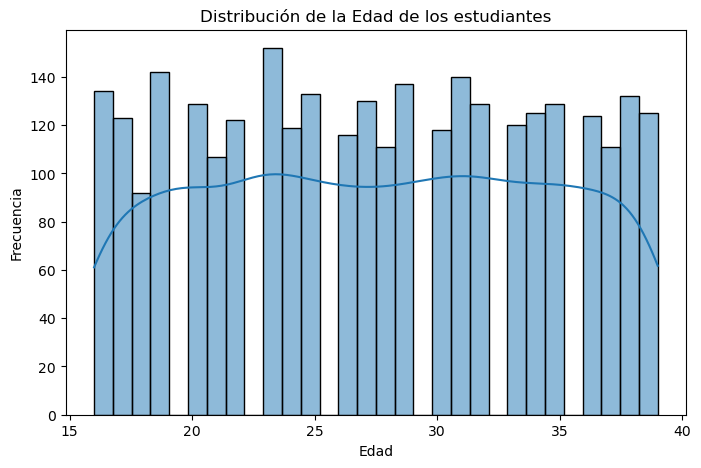

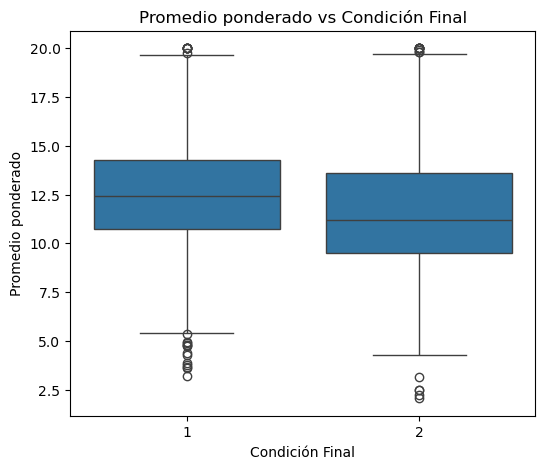

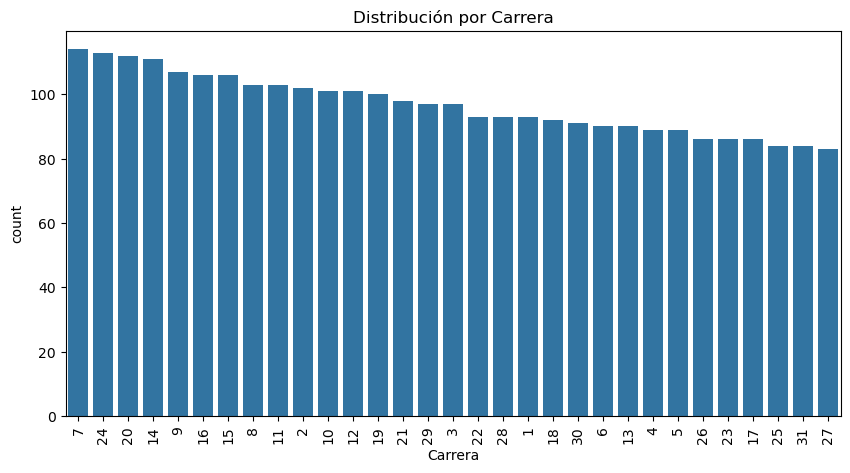

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de Edad de los estudiantes
plt.figure(figsize=(8,5))
sns.histplot(df['Edad'], bins=30, kde=True)
plt.title("Distribución de la Edad de los estudiantes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de promedio ponderado por Condición Final
plt.figure(figsize=(6,5))
sns.boxplot(x='Condición Final', y='Promedio ponderado del semestre', data=df)
plt.title("Promedio ponderado vs Condición Final")
plt.xlabel("Condición Final")
plt.ylabel("Promedio ponderado")
plt.show()

# Conteo de carreras
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Carrera', order=df['Carrera'].value_counts().index)
plt.title("Distribución por Carrera")
plt.xticks(rotation=90)
plt.show()



#### 3.3 Análisis exploratorio (con estadísticas): Correlaciones y cruces de variables

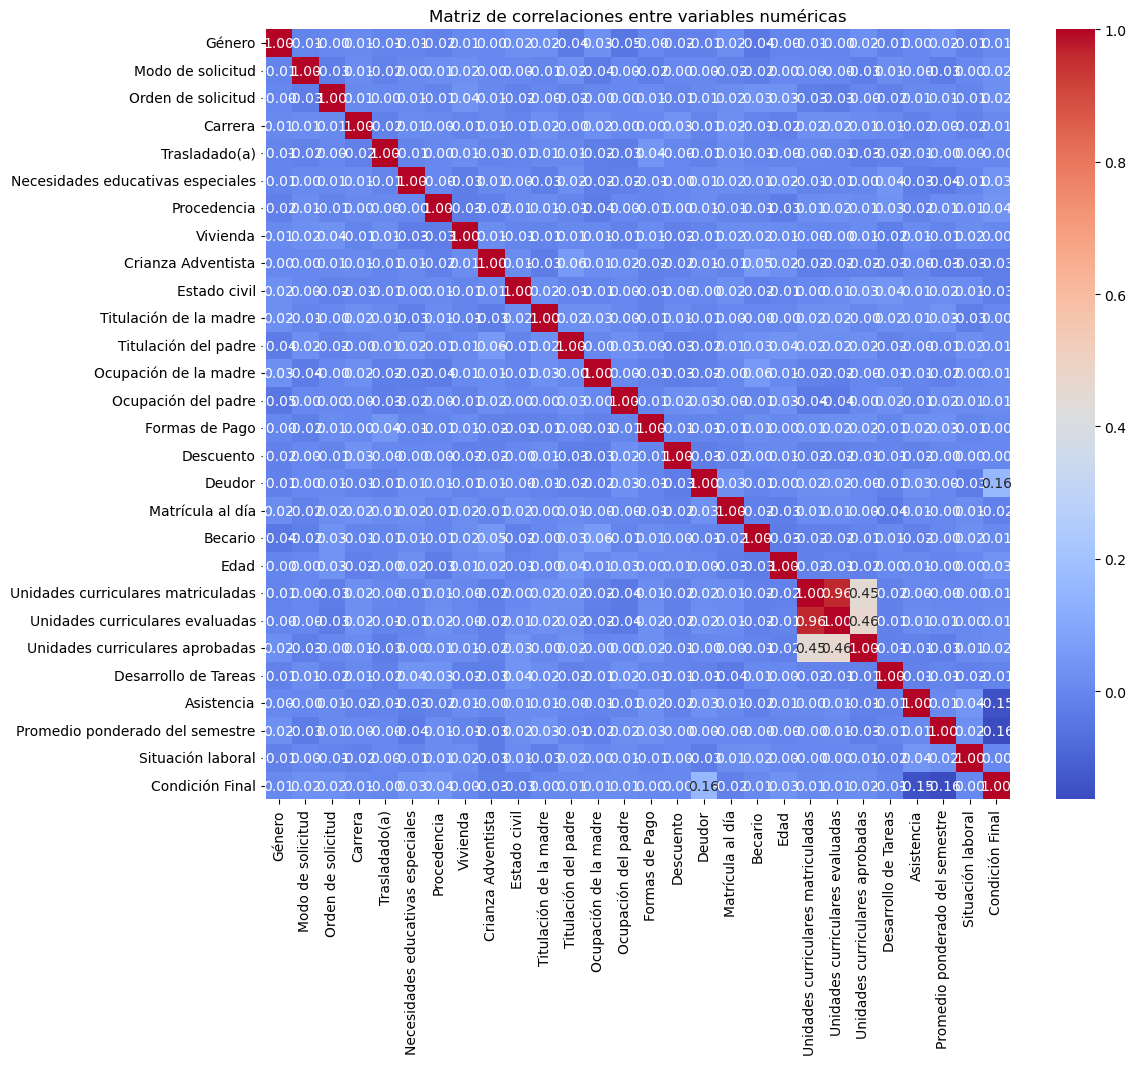


Distribución porcentual de Condición Final por Género:

Condición Final          1          2
Género                               
0                53.721683  46.278317
1                52.852234  47.147766

Distribución porcentual de Condición Final por Situación laboral:

Condición Final            1          2
Situación laboral                      
0                  53.727945  46.272055
1                  51.677852  48.322148
2                  54.216867  45.783133

Distribución porcentual de Condición Final por Carrera:

Condición Final          1          2
Carrera                              
1                60.215054  39.784946
2                51.960784  48.039216
3                58.762887  41.237113
4                58.426966  41.573034
5                47.191011  52.808989


In [41]:
# 1. Correlaciones numéricas (rendimiento académico, edad, asistencia, etc.)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlaciones entre variables numéricas")
plt.show()

# 2. Cruce de variables categóricas con la variable objetivo (Condición Final)
# Ejemplo: Género vs Condición Final
cruce_genero = pd.crosstab(df['Género'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Género:\n")
print(cruce_genero)

# Otro ejemplo: Situación laboral vs Condición Final
cruce_trabajo = pd.crosstab(df['Situación laboral'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Situación laboral:\n")
print(cruce_trabajo)

# Otro ejemplo: Carrera vs Condición Final (puede ser más grande)
cruce_carrera = pd.crosstab(df['Carrera'], df['Condición Final'], normalize='index') * 100
print("\nDistribución porcentual de Condición Final por Carrera:\n")
print(cruce_carrera.head())  # solo mostramos las primeras filas para no saturar

#### 3.4 Diagnóstico de calidad inicial 


Valores faltantes por columna:

Género                                0
Modo de solicitud                     0
Orden de solicitud                    0
Carrera                               0
Trasladado(a)                         0
Necesidades educativas especiales     0
Procedencia                           0
Vivienda                              0
Crianza Adventista                    0
Estado civil                          0
Titulación de la madre                0
Titulación del padre                  0
Ocupación de la madre                 0
Ocupación del padre                   0
Formas de Pago                        0
Descuento                             0
Deudor                                0
Matrícula al día                      0
Becario                               0
Edad                                  0
Unidades curriculares matriculadas    0
Unidades curriculares evaluadas       0
Unidades curriculares aprobadas       0
Desarrollo de Tareas                  0
Asisten

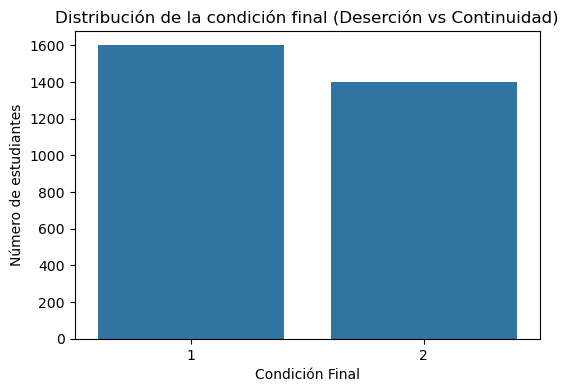

In [42]:
# --- 1. Valores faltantes ---
print("\nValores faltantes por columna:\n")
print(df.isnull().sum())

# --- 2. Posibles inconsistencias ---
# Edad
print("\nEdad mínima y máxima:")
print("Mínimo:", df['Edad'].min())
print("Máximo:", df['Edad'].max())

# Promedio ponderado
print("\nPromedio ponderado mínimo y máximo:")
print("Mínimo:", df['Promedio ponderado del semestre'].min())
print("Máximo:", df['Promedio ponderado del semestre'].max())

# Nota: aquí puedes revisar si hay edades imposibles (ej. 5 años o 90 años) o promedios fuera de rango (ej. >20 en escala peruana).

# --- 3. Distribución de la variable objetivo ---
plt.figure(figsize=(6,4))
sns.countplot(x='Condición Final', data=df, order=df['Condición Final'].value_counts().index)
plt.title("Distribución de la condición final (Deserción vs Continuidad)")
plt.xlabel("Condición Final")
plt.ylabel("Número de estudiantes")
plt.show()



In [43]:
# --- 1. Valores faltantes ---
na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (na_counts/len(df)*100).round(2)
quality_missing = pd.DataFrame({'missing': na_counts, 'missing_%': na_pct})
display(quality_missing)

# --- 2. Duplicados ---
# Usamos ID de estudiante + Carrera + Año/Semestre (si lo tienes en tu data)
# Si no tienes fecha, dejamos solo ID
if 'ID' in df.columns:
    dup_keys = df.duplicated(subset=['ID','Carrera'], keep=False)
    print('Registros potencialmente duplicados:', dup_keys.sum())
else:
    dup_keys = df.duplicated()
    print('Registros potencialmente duplicados:', dup_keys.sum())

# --- 3. Registros sospechosos ---
# Definimos reglas simples para detectar datos poco realistas
suspects = df[
    (df['Edad'] < 15) | (df['Edad'] > 70) |   # Edades sospechosas
    (df['Promedio ponderado del semestre'] < 0) | 
    (df['Promedio ponderado del semestre'] > 20)  # Notas fuera del rango
]

print("Registros sospechosos detectados:", len(suspects))
if len(suspects) > 0:
    display(suspects[['ID','Edad','Carrera','Promedio ponderado del semestre','Condición Final']].head())



,missing,missing_%
Género,0,0.0
Modo de solicitud,0,0.0
Situación laboral,0,0.0
Promedio ponderado del semestre,0,0.0
Asistencia,0,0.0
Desarrollo de Tareas,0,0.0
Unidades curriculares aprobadas,0,0.0
Unidades curriculares evaluadas,0,0.0
Unidades curriculares matriculadas,0,0.0
Edad,0,0.0


Registros potencialmente duplicados: 0
Registros sospechosos detectados: 0


#### 3.5 Perfil estadístico comparativo (Aprobados vs Desaprobados)

In [30]:
# Medias comparativas de variables numéricas según la Condición Final
medias_comparativas = df.groupby('Condición Final').mean(numeric_only=True)
display(medias_comparativas)


,Género,Modo de solicitud,Orden de solicitud,Carrera,Trasladado(a),Necesidades educativas especiales,Procedencia,Vivienda,Crianza Adventista,Estado civil,...,Matrícula al día,Becario,Edad,Unidades curriculares matriculadas,Unidades curriculares evaluadas,Unidades curriculares aprobadas,Desarrollo de Tareas,Asistencia,Promedio ponderado del semestre,Situación laboral
Condición Final,,,,,,,,,,,,,,,,,,,,,
1,0.480926,3.481551,1.975610,15.687305,0.494684,0.048780,1.630394,2.010632,0.504065,1.110694,...,0.820513,0.150094,27.307067,5.530957,5.008755,2.454659,70.645403,72.165729,12.418774,0.578487
2,0.489650,3.564597,2.014276,15.827980,0.491792,0.061385,1.673091,2.016417,0.477516,1.094932,...,0.803712,0.154176,27.776588,5.556031,5.042827,2.525339,70.285510,67.000714,11.449044,0.582441


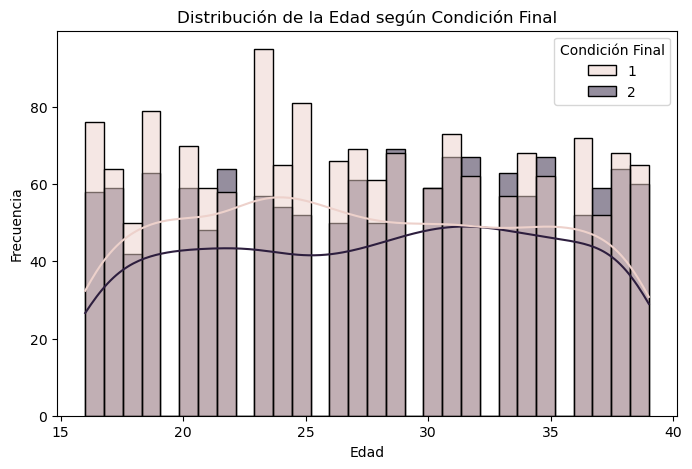

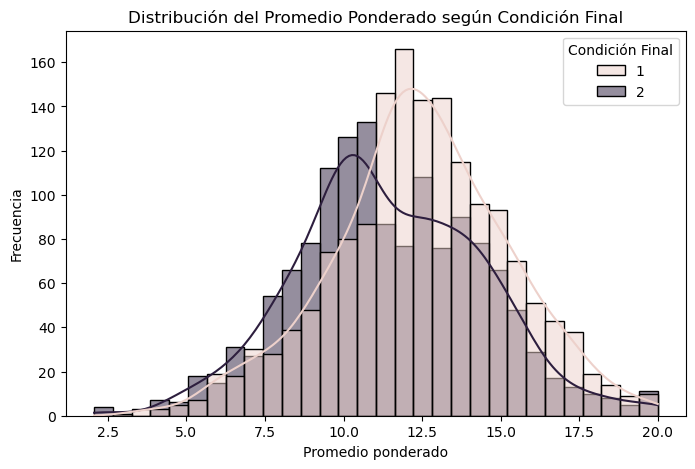

In [31]:
# 1. Distribución de la Edad según Condición Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Edad', hue='Condición Final', kde=True, bins=30)
plt.title("Distribución de la Edad según Condición Final")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# 2. Distribución del Promedio ponderado según Condición Final
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Promedio ponderado del semestre', hue='Condición Final', kde=True, bins=30)
plt.title("Distribución del Promedio Ponderado según Condición Final")
plt.xlabel("Promedio ponderado")
plt.ylabel("Frecuencia")
plt.show()

In [32]:
# Perfil numérico: estadísticas por Condición Final
perfil_num = df.groupby('Condición Final')[['Edad','Promedio ponderado del semestre']]
perfil_num = perfil_num.agg(['mean','median','std','min','max']).round(3)
display(perfil_num)

# Perfil categórico: distribución porcentual según Condición Final
perfil_cat_genero = pd.crosstab(df['Género'], df['Condición Final'], normalize='columns')*100
perfil_cat_trabajo = pd.crosstab(df['Situación laboral'], df['Condición Final'], normalize='columns')*100
perfil_cat_carrera = pd.crosstab(df['Carrera'], df['Condición Final'], normalize='columns')*100

display(perfil_cat_genero.round(2))
display(perfil_cat_trabajo.round(2))
display(perfil_cat_carrera.round(2).head())  # solo primeras filas si son muchas carreras

# Exportar perfiles a CSV
perfil_num.to_csv('perfil_numerico_por_condicion.csv')
perfil_cat_genero.to_csv('perfil_genero_por_condicion.csv')
perfil_cat_trabajo.to_csv('perfil_trabajo_por_condicion.csv')
perfil_cat_carrera.to_csv('perfil_carrera_por_condicion.csv')

print('Archivos CSV exportados.')


Edad                       Promedio ponderado del semestre  \
                   mean median    std min max                            mean   
Condición Final                                                                 
1                27.307   27.0  6.878  16  39                          12.419   
2                27.777   28.0  6.909  16  39                          11.449   

                                           
                median    std   min   max  
Condición Final                            
1                12.40  2.863  3.20  20.0  
2                11.19  2.984  2.06  20.0

Condición Final,1,2
Género,,
0,51.91,51.03
1,48.09,48.97


Condición Final,1,2
Situación laboral,,
0,59.04,58.03
1,24.08,25.70
2,16.89,16.27


Condición Final,1,2
Carrera,,
1,3.50,2.64
2,3.31,3.50
3,3.56,2.86
4,3.25,2.64
5,2.63,3.35


Archivos CSV exportados.


### 3.6 Hallazgos

**Resumen general**
- Registros: **3.000** estudiantes.  
- Variables totales: **30** columnas (incluye identificadores, predictores y variable objetivo).  
- Variable objetivo: **`Condición Final`** (codificada: **1 = Graduado**, **2 = Desertó**).  
  - Distribución en el dataset: **≈ 53.3% = 1 (Graduado)** vs **≈ 46.7% = 2 (Desertó)**.  
  - Interpretación: la proporción entre graduados y desertores está relativamente balanceada, lo que facilita el entrenamiento sin necesidad inmediata de técnicas pesadas de remuestreo.

---

## A. Sobre las variables (tipos y codificaciones)
**Variables categóricas (codificadas numéricamente o binarias)**  
- `Género` (0 = Hombre, 1 = Mujer)  
- `Modo de solicitud` (1–6; vías de ingreso: examen ordinario, traslado externo/interno, convenio/beca, ingreso directo, reingreso)  
- `Orden de solicitud` (1 = 1.ª opción, 2 = 2.ª, 3 = 3.ª)  
- `Carrera` (1–31; ver tabla abajo con mapeo)  
- `Trasladado(a)` (0 = No, 1 = Sí)  
- `Necesidades educativas especiales` (0 = No, 1 = Sí)  
- `Procedencia` (1 = Lima, 2 = Provincia, 3 = Extranjero)  
- `Vivienda` (1 = Residencia, 2 = Familiares, 3 = Alquila cuarto)  
- `Crianza Adventista` (0 = No, 1 = Sí)  
- `Estado civil` (1 = Soltero, 2 = Casado)  
- `Titulación de la madre` / `Titulación del padre` (1–5: Sin estudios → Educación superior) — orden ordinal.  
- `Ocupación de la madre` / `Ocupación del padre` (1–10; ver tabla abajo)  
- `Formas de Pago` (1 = Armadas, 2 = Contado, 3 = Otros)  
- `Descuento` (0–5; ver tabla abajo)  
- `Deudor` (0 = No, 1 = Sí)  
- `Matrícula al día` (0 = No, 1 = Sí)  
- `Becario` (0 = No, 1 = Sí)  
- `Situación laboral` (0 = No trabaja, 1 = Medio tiempo, 2 = Tiempo completo)

**Variables numéricas**
- `Edad` (años, entero).  
- `Unidades curriculares 1.º sem (matriculadas/evaluadas/aprobadas)` (enteros).  
- `Desarrollo de Tareas` (porcentaje).  
- `Asistencia` (porcentaje).  
- `Promedio ponderado del semestre` (nota, rango esperado 0–20).

**Identificador (no predictivo)**
- `ID` y `Nombres Completos` — no se usarán en el modelo (solo trazabilidad).

---

## B. Tablas de referencia (mapeos)
**Carrera (mapeo resumido)** — algunos ejemplos:
| Código | Carrera |
| --- | --- |
| 1 | Administración |
| 2 | Contabilidad, Gestión Tributaria y Aduanera |
| 3 | Marketing y Negocios Internacionales |
| ... | ... |
| 23 | Ingeniería en Ciencia de Datos |
| 28 | Medicina Humana |
| 31 | Teología |

**Ocupación (padre/madre)**
| Código | Categoría ocupacional |
| --- | --- |
| 1 | Profesionales y técnicos |
| 2 | Empleados administrativos / oficina |
| 3 | Comerciantes / vendedores |
| 4 | Obreros / trabajadores manuales |
| 5 | Agricultores / ganaderos / pescadores |
| 6 | Militares / policías / fuerzas del orden |
| 7 | Servicios personales y domésticos |
| 8 | Ama de casa |
| 9 | Desempleado / sin ocupación |
| 10 | Otros / no especificado |

**Descuento**
| Código | Tipo de descuento |
| --- | --- |
| 0 | No tiene descuento |
| 1 | Descuento por procedencia de colegio adventista |
| 2 | Descuento por hermanos en UPeU |
| 3 | Descuento por convenio institucional/iglesia |
| 4 | Descuento académico |
| 5 | Otro descuento |

*(Nota: incluir en el anexo la tabla completa de `Carrera` si se necesita reproducibilidad.)*

---

## C. Hallazgos principales (resumen ejecutivo)

### 1. Señales académicas
- **Promedio ponderado**: los graduados muestran **promedios más altos** en promedio que los desertores. La diferencia de medias es clara y consistente con cuadros univariados (histogramas / boxplots).  
- **Asistencia y Desarrollo de Tareas**: los estudiantes que permanecen tienden a tener **mayor asistencia** y cumplimiento de tareas; estas variables son señales útiles y complementarias al promedio.  
- **Unidades aprobadas / evaluadas**: aportan información sobre carga y desempeño; su combinación con promedio y asistencia mejora la discriminación de riesgo.

**Implicación:** el eje _rendimiento académico_ (promedio + asistencia + unidades aprobadas) es el predictor más robusto univariado de deserción.

### 2. Señales económicas / de permanencia
- **Deudor** y **Matrícula al día**: ser deudor se asocia a una mayor probabilidad de deserción; los desertores presentan una proporción mayor de deudores respecto a graduados.  
- **Formas de Pago** y **Descuento**: permiten identificar grupos con fragilidad financiera (p.ej. pagos a plazos o ausencia de beca/descuento relevante).

**Implicación:** el eje _riesgo financiero_ es un segundo factor clave para priorizar intervenciones (alertas tempranas, planes de pago, becas).

### 3. Demográficos y contexto
- **Edad**: ligeras diferencias (los desertores pueden ser marginalmente mayores en promedio), probablemente por mayor carga laboral.  
- **Situación laboral**: estudiantes que trabajan tiempo completo presentan mayor riesgo de deserción, por conflicto tiempo-estudio.  
- **Necesidades educativas especiales (NEE)**: grupo pequeño, con riesgo aumentado de deserción — requiere atención diferenciada.

### 4. Programa / admisión
- **Carrera**: heterogeneidad en tasas de deserción entre carreras; algunas muestran tasas sustancialmente por encima del promedio.  
- **Orden de solicitud / Modo de ingreso**: la 1.ª opción y ciertos modos de ingreso (p.ej. ingreso ordinario) muestran menor deserción que traslados o reingresos.

**Implicación:** incorporar efectos por carrera o segmentar modelos por grupos de carreras puede mejorar precisión.

### 5. Calidad de los datos (observaciones)
- En tu ejecución previa detectaste **pocos o nulos valores faltantes** y **sin duplicados por `ID`**, lo que es positivo para modelado.  
- Los rangos de `Edad` y `Promedio` son plausibles (ej.: edad entre ~16–39; promedio 0–20).  
- Muchas variables están codificadas numéricamente (aunque conceptualmente categóricas): conviene convertir las que son nominales a tipo `category`.

---

## D. Variables candidatas finales (sugeridas para X e y)
**Objetivo**
- `y = Condición Final` (1 = Graduado, 2 = Desertó)

**Predictoras (X) recomendadas**
- Académicas: `Promedio ponderado del semestre`, `Asistencia`, `Desarrollo de Tareas`, `Unidades curriculares (matriculadas/evaluadas/aprobadas)`  
- Financieras: `Deudor`, `Matrícula al día`, `Formas de Pago`, `Descuento`, `Becario`  
- Contexto / programa: `Carrera`, `Modo de solicitud`, `Orden de solicitud`, `Trasladado(a)`  
- Personales: `Edad`, `Género`, `Situación laboral`, `Necesidades educativas especiales`, `Vivienda`, `Procedencia`  
- Familiares: `Titulación de la madre`, `Titulación del padre`, `Ocupación de la madre`, `Ocupación del padre`

**Excluir**: `ID`, `Nombres Completos` (metadatos).

---

## E. Recomendaciones de preprocesamiento (Data Preparation)
1. **Tipar variables correctamente**
   - Convertir nominales codificadas (Carrera, Modo de solicitud, Procedencia, Vivienda, Formas de Pago, Descuento, Ocupaciones) a `category`.  
   - Mantener nivel ordinal para títulos de padres (1→5), si usar modelos que aprovechen orden; alternativamente one-hot.

2. **Imputación y limpieza**
   - Revisar columnas con NA (si aparecen), imputar según contexto: categorías con label "Unknown" o imputación por moda; numéricas con medianas.  
   - Tratar outliers plausibles (ej. edad fuera de rango o promedios fuera de 0–20).

3. **Codificación**
   - Para categorías de baja cardinalidad (Género, Deudor, Matrícula al día, Becario): usar integer encoding o leave as category.  
   - Para `Carrera` (alta cardinalidad): considerar **target encoding** o **one-hot** si no hay muchas categorías; alternativa: agrupar carreras poco frecuentes en "Otros".  
   - Para ocupaciones (padre/madre): agrupar categorías similares si hay poca representación.

4. **Escalado**
   - Escalar numéricas (Promedio, Edad, Asistencia, Desarrollo) si el modelo lo requiere (SVM, redes, regresión). No obligatorio para árboles.

5. **Balanceo / objetivos**
   - Como el target está ~53/47, no es imprescindible re-muestrear; sin embargo, si la métrica prioritaria es **recall de desertores** (capturar el mayor número posible de desertores), evaluar `class_weight` o ligeros oversampling en validación.

6. **Feature engineering**
   - `academic_risk_flag`: combinación binaria (Promedio < umbral AND Asistencia < umbral).  
   - `financial_risk_flag`: Deudor = 1 y Matrícula no al día = 1 → riesgo financiero.  
   - `workload_proxy`: unidades matriculadas + situación laboral (tiempo completo → mayor carga).  
   - Interacciones: `Promedio * Situación laboral`, `Carrera * Promedio`.

---

## F. Métricas y estrategias de evaluación sugeridas
- Métricas: **Recall (sensitivity)** para la clase `Desertó`, **Precision**, **F1-score**, curva ROC-AUC.  
- Validación: **k-fold estratificado** (mantener proporción de clases).  
- Interpretabilidad: usar modelos explicables (Random Forest + SHAP, regresión logística con regularización) para derivar reglas de intervención.

---

## G. Acciones operativas recomendadas (para el negocio)
1. **Sistema de alertas tempranas**: combinar `academic_risk_flag` + `financial_risk_flag` para priorizar llamados/asesorías y asignación de becas/planes de pago.  
2. **Segmentación por carrera**: enfocar programas de retención en carreras con mayor tasa de deserción.  
3. **Atención a NEE**: crear rutas de acompañamiento académico para estudiantes con necesidades educativas especiales.

---

### Conclusión
El análisis exploratorio muestra que **el rendimiento académico (promedio y asistencia)** y **la situación financiera (deuda, matrícula)** son los ejes más informativos para predecir deserción. Variables de admisión y carrera actúan como moderadores y ayudan a segmentar las intervenciones. La calidad de datos es adecuada para avanzar a la fase de preparación y modelado tras tipar correctamente las variables categóricas y ejecutar las transformaciones recomendadas.
